In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_df = pd.read_csv('stud_math.csv')

In [2]:
display(stud_df.head(10))
stud_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
'''Changing the naming of columns to unify the format'''

stud_df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'parstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_detailed', 'uni_wish', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [4]:
'''removing lines without score'''
stud_df.dropna(subset=['score'], inplace=True) #уберем строки в которых нет рейтинга учеников, так как они бесполезны для анализа

In [5]:
'''removing mistakes in the age column'''
stud_df['age'] = stud_df.age.apply(lambda x: 15 if x<15 else x)
stud_df['age'] = stud_df.age.apply(lambda x: 22 if x>22 else x)

'''removing mistakes in ratings 0 to 4'''
r04_col = ['medu', 'fedu']
for col in r04_col:
    stud_df[col] = stud_df[col].apply(lambda x: 0 if x<0 else x)
    stud_df[col] = stud_df[col].apply(lambda x: 4 if x>4 else x)
    
'''removing mistakes in ratings 1 to 4'''
r14_col = ['traveltime', 'studytime']
for col in r14_col:
    stud_df[col] = stud_df[col].apply(lambda x: 0 if x<0 else x)
    stud_df[col] = stud_df[col].apply(lambda x: 4 if x>4 else x)
    
'''removing mistakes in ratings 1 to 5'''
r14_col = ['famrel', 'freetime', 'goout', 'health']
for col in r14_col:
    stud_df[col] = stud_df[col].apply(lambda x: 1 if x<1 else x)
    stud_df[col] = stud_df[col].apply(lambda x: 5 if x>5 else x)
    
'''replace empty and nan values with "other" value for the columns with this option'''
other_col = ['mjob','fjob','reason','guardian']
for col in other_col:
    stud_df[col] = stud_df[col].astype(str).apply(lambda x: 'other' if x.strip() == '' else x)
    stud_df[col] = stud_df[col].astype(str).apply(lambda x: 'other' if x.strip() == 'nan' else x)

In [6]:
'''major functions definition'''

'''qualitative data analysis'''
def qual_anal(df_name, col_name):
    display(pd.DataFrame(df_name[col_name].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (df_name[col_name].value_counts()>10).sum())
    df_name.loc[:, [col_name]].info()    
    
'''quantitative data analysis'''    
def quan_anal(df_name, col_name, bins_num):
    median = df_name[col_name].median()
    IQR = df_name[col_name].quantile(0.75) - df_name[col_name].quantile(0.25)
    perc25 = df_name[col_name].quantile(0.25)
    perc75 = df_name[col_name].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    df_name[col_name].loc[df_name[col_name].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = bins_num, label = 'IQR', grid = False)
    plt.legend()

'''building boxplot'''
def get_boxplot(df_name, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df_name.loc[df_name.loc[:, column].isin(df_name.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [7]:
'''checking the DataFrame after adjustments'''
display(stud_df.head(10))
stud_df.info()
#we have 389 students with recorded score
#we have some missing data in the columns which I will ignore for this moment
#we have 30 columns (17 qualitative and 13 quantitative)

,school,sex,age,address,famsize,parstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_detailed,uni_wish,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              389 non-null    object 
 1   sex                 389 non-null    object 
 2   age                 389 non-null    int64  
 3   address             374 non-null    object 
 4   famsize             362 non-null    object 
 5   parstatus           344 non-null    object 
 6   medu                386 non-null    float64
 7   fedu                365 non-null    float64
 8   mjob                389 non-null    object 
 9   fjob                389 non-null    object 
 10  reason              389 non-null    object 
 11  guardian            389 non-null    object 
 12  traveltime          361 non-null    float64
 13  studytime           382 non-null    float64
 14  failures            367 non-null    float64
 15  schoolsup           380 non-null    object 
 16  famsup  

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

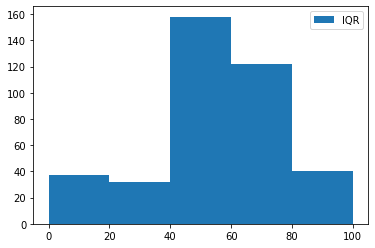

In [8]:
'''checking the score column'''
quan_anal(stud_df, 'score', 5)
stud_df.score.describe()
#we have score records for 389 students
#mean is 52 and median is 55. they are close, so we have almost bell distribution of the score
#standard deviation is 23. it looks to be pretty high and shows that math scores are widely disperced
#IQR is 30
#there are no outliers and score is distributed between 0 and 100
#only 25% of students have score lower than 40

In [9]:
'''analysing school column'''
qual_anal(stud_df, 'school')
#we have only two schools in data set
#GP seems to be the major school
#MS looks like very small school with only 45 students

,school
GP,344
MS,45


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [10]:
'''analysing statistical information of the schools'''
stud_df.groupby(['school'])[['score']].describe()
#mean and median of MS school is lightly lower, but very close
#top score in MS is only 95, while GP has 100 max score
#standard deviation and IQR are very close
#we can conclude that school has no major impact on the score

score                                                    
        count       mean        std  min   25%   50%   75%    max
school                                                           
GP      344.0  52.630814  23.116772  0.0  40.0  55.0  70.0  100.0
MS       45.0  49.444444  21.379212  0.0  40.0  50.0  65.0   95.0

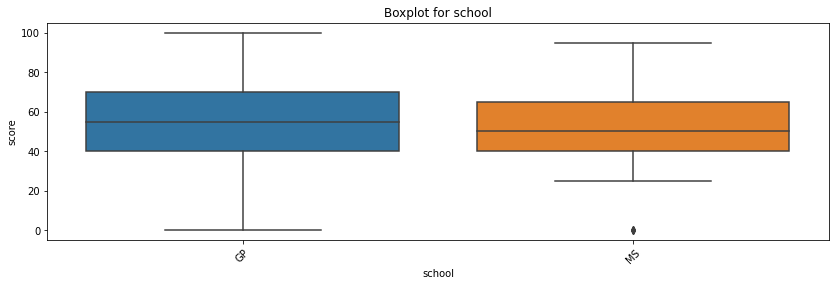

In [11]:
'''building boxplot of the score / schools comparison'''
get_boxplot(stud_df, 'school')
#visuallizing data showed above
#we see oulier in MS school

In [12]:
'''comparing histograms of two schools'''
gp_df = stud_df[stud_df.school == 'GP']
ms_df = stud_df[stud_df.school == 'MS']

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


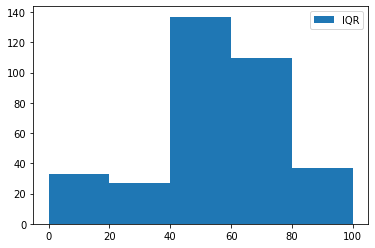

In [13]:
quan_anal(gp_df, 'score', 5)

25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 25.0,  Границы выбросов: [2.5, 102.5].


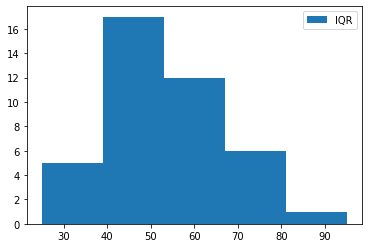

In [14]:
quan_anal(ms_df, 'score', 5)

In [15]:
'''checking the ouliers in ms'''
ms_df[ms_df.score < 2.5]
#these data lines needs to be doublecheked as they may be recorded incorrectly
#they may impact the overall holistic picture of ms school

,school,sex,age,address,famsize,parstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_detailed,uni_wish,internet,romantic,famrel,freetime,goout,health,absences,score
367,MS,F,17,R,NaN,T,1.0,1.0,other,services,reputation,mother,3.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,5.0,2.0,1.0,1.0,0.0,0.0
383,MS,M,19,R,GT3,T,1.0,1.0,other,services,other,mother,2.0,1.0,1.0,no,no,no,no,NaN,-3.0,yes,no,no,4.0,3.0,2.0,5.0,0.0,0.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


In [16]:
'''analysing gender data'''
qual_anal(stud_df, 'sex')
#we have no missed data
#we have almost equal distribution of boys and girls

,sex
F,204
M,185


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [17]:
'''comparing the statistics depending on gender'''
stud_df.groupby(['sex'])[['score']].describe()
#boys have higher average score 55 comparing to 50 for girls
#median is the same, which means that girls have distribution squized to the left
#standard deviation is almost the same
#there are no girls who got 100 score

score                                                    
     count       mean        std  min   25%   50%   75%    max
sex                                                           
F    204.0  50.098039  23.070682  0.0  40.0  55.0  65.0   95.0
M    185.0  54.648649  22.572608  0.0  45.0  55.0  70.0  100.0

In [18]:
'''compare students score data in each gender'''
fem_df = stud_df[stud_df.sex == 'F']
male_df = stud_df[stud_df.sex == 'M']

25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 25.0,  Границы выбросов: [2.5, 102.5].


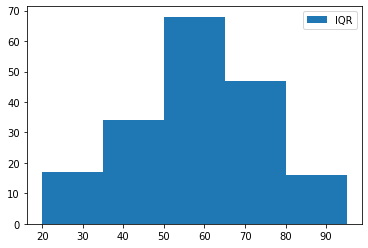

In [19]:
quan_anal(fem_df, 'score', 5)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


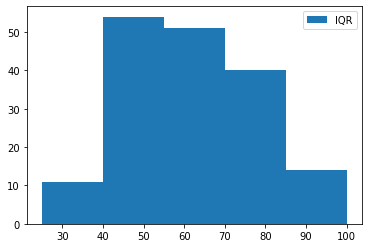

In [20]:
quan_anal(male_df, 'score', 5)

In [21]:
fem_df[fem_df.score <2.5]
#outliers for girls

,school,sex,age,address,famsize,parstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_detailed,uni_wish,internet,romantic,famrel,freetime,goout,health,absences,score
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,other,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
173,GP,F,16,U,GT3,T,1.0,3.0,at_home,services,home,other,1.0,2.0,3.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0
221,GP,F,17,U,NaN,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,-9.0,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
259,GP,F,17,U,LE3,T,2.0,NaN,services,services,course,father,1.0,4.0,0.0,no,no,yes,yes,yes,-12.0,yes,NaN,yes,3.0,4.0,1.0,NaN,0.0,0.0
264,GP,F,18,U,GT3,T,2.0,2.0,at_home,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,3.0,0.0,0.0


In [22]:
male_df[male_df.score <7.5]
#outliers for boys

,school,sex,age,address,famsize,parstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_detailed,uni_wish,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,other,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,other,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,NaN,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
162,GP,M,16,U,LE3,T,1.0,2.0,other,other,course,mother,2.0,1.0,1.0,no,no,no,yes,yes,-3.0,yes,NaN,NaN,4.0,4.0,4.0,5.0,0.0,0.0


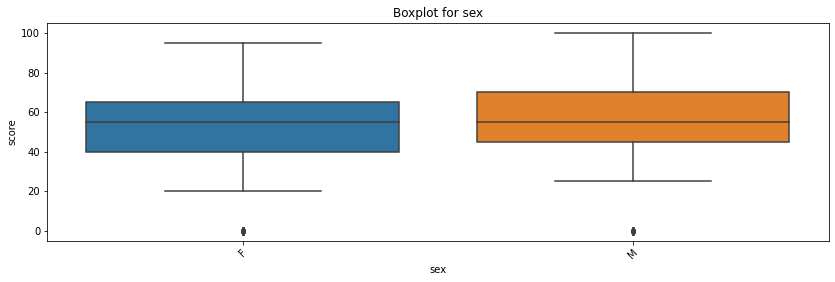

In [23]:
get_boxplot(stud_df, 'sex')
#we see that gender has no major impact on the score

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


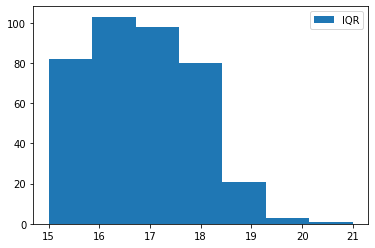

In [24]:
quan_anal(stud_df, 'age', 7)

In [25]:
'''analysing age / score interconnection'''
stud_df.groupby(['age'])[['score']].describe()
#as we have only 5 students with the age above 20 we can't use their result for furhter approximation
#nevertheless, we see that average as well as median score is decresing for older students
#it seems to be negatively correlated

score                                                      
     count       mean        std   min    25%   50%   75%    max
age                                                             
15    82.0  56.280488  22.984307   0.0  46.25  55.0  75.0   95.0
16   103.0  55.194175  21.510626   0.0  45.00  55.0  70.0  100.0
17    98.0  51.377551  21.452184   0.0  45.00  55.0  65.0   90.0
18    80.0  48.312500  24.700020   0.0  40.00  50.0  65.0   95.0
19    21.0  40.238095  24.468152   0.0  40.00  45.0  55.0   65.0
20     3.0  70.000000  22.912878  45.0  60.00  75.0  82.5   90.0
21     1.0  35.000000        NaN  35.0  35.00  35.0  35.0   35.0
22     1.0  40.000000        NaN  40.0  40.00  40.0  40.0   40.0

In [26]:
stud_df[stud_df.age < 20].corr()
#in the table blow we see that age and score are quite negatively correlated with correlation coeficinet of -0.17
#it is more correlated only with Mothers' education (medu) and Failures which we will analyse later
#21 and 22 years old students have very poor results. we can check those two students' details

,age,medu,fedu,traveltime,studytime,failures,studytime_detailed,famrel,freetime,goout,health,absences,score
age,1.000000,-0.150040,-0.121349,0.097077,0.008007,0.112254,-0.008007,0.008344,-0.043805,0.106190,-0.055549,0.043515,-0.171707
medu,-0.150040,1.000000,0.625470,-0.173435,0.074723,-0.243535,-0.074723,-0.001160,0.046452,0.073609,-0.048446,0.002267,0.208525
fedu,-0.121349,0.625470,1.000000,-0.139597,0.007630,-0.253442,-0.007630,-0.002040,-0.000718,0.059179,0.011545,0.036845,0.130757
traveltime,0.097077,-0.173435,-0.139597,1.000000,-0.116461,0.065405,0.116461,-0.026559,-0.017400,0.037248,-0.012209,-0.036936,-0.073556
studytime,0.008007,0.074723,0.007630,-0.116461,1.000000,-0.175798,-1.000000,0.049461,-0.115330,-0.049044,-0.082959,-0.027555,0.115586
failures,0.112254,-0.243535,-0.253442,0.065405,-0.175798,1.000000,0.175798,-0.065901,0.054098,0.091380,0.120192,0.001393,-0.355198
studytime_detailed,-0.008007,-0.074723,-0.007630,0.116461,-1.000000,0.175798,1.000000,-0.049461,0.115330,0.049044,0.082959,0.027555,-0.115586
famrel,0.008344,-0.001160,-0.002040,-0.026559,0.049461,-0.065901,-0.049461,1.000000,0.151960,0.065669,0.094249,-0.125303,0.052793
freetime,-0.043805,0.046452,-0.000718,-0.017400,-0.115330,0.054098,0.115330,0.151960,1.000000,0.295768,0.065525,-0.033947,0.015520
goout,0.106190,0.073609,0.059179,0.037248,-0.049044,0.091380,0.049044,0.065669,0.295768,1.000000,-0.010291,-0.077623,-0.127550


In [27]:
stud_df[stud_df.age > 20]

,school,sex,age,address,famsize,parstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_detailed,uni_wish,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,other,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


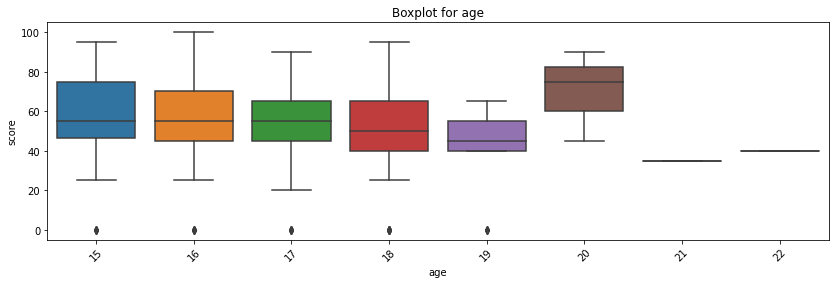

In [28]:
get_boxplot(stud_df, 'age')

In [29]:
'''analysing adrress column'''
qual_anal(stud_df, 'address')
#there are 15 lines with missing address details. we will ignore them for the timebeing.
#majority of students leave in Urban area.

,address
U,291
R,83


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [30]:
'''checking the overall statistics based on address column data'''
stud_df.groupby(['address'])[['score']].describe()
#students from rural areas have significantly lower average score
#low percentile and high percentile are also lower in rural than in urban students list
#no students from rural areas reached 100 score
#standard deviation is very close
#we can consider address as one of the correlated conditions impacting math score

score                                                    
         count       mean        std  min   25%   50%   75%    max
address                                                           
R         83.0  46.927711  23.148926  0.0  35.0  50.0  60.0   95.0
U        291.0  53.573883  22.824908  0.0  45.0  55.0  70.0  100.0

In [31]:
u_df = stud_df[stud_df.address == 'U']
r_df = stud_df[stud_df.address == 'R']

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


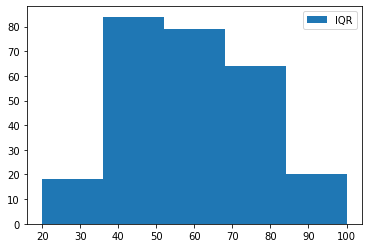

In [32]:
quan_anal(u_df, 'score', 5)

25-й перцентиль: 35.0, 75-й перцентиль: 60.0, IQR: 25.0,  Границы выбросов: [-2.5, 97.5].


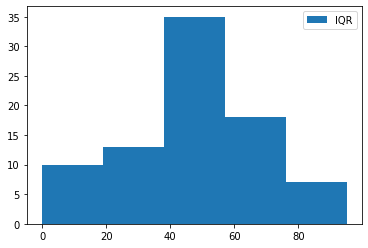

In [33]:
quan_anal(r_df, 'score', 5)

In [34]:
'''dependency from family size'''
qual_anal(stud_df, 'famsize')
#more students leave in the families with more than 3 people

,famsize
GT3,255
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [35]:
stud_df.groupby(['famsize'])[['score']].describe()
#average and median values for GT3 and LE3 are very close or equal, as well as min and max value
#I do not see high interdependency between family size and math score

score                                                    
         count       mean        std  min   25%   50%   75%    max
famsize                                                           
GT3      255.0  51.509804  23.388513  0.0  40.0  55.0  70.0  100.0
LE3      107.0  54.672897  21.360242  0.0  45.0  55.0  67.5   95.0

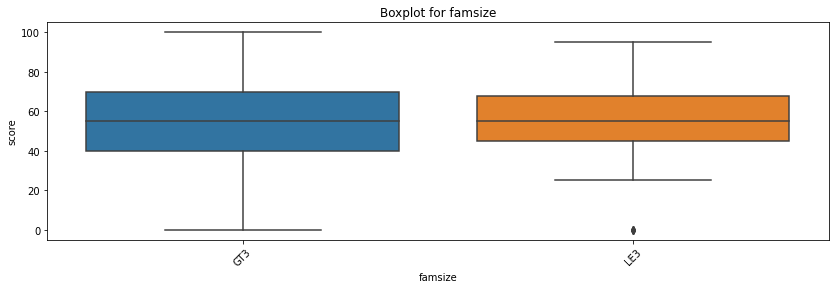

In [36]:
get_boxplot(stud_df, 'famsize')

In [37]:
'''checking dependency between parents leaving together or appart and math score'''
qual_anal(stud_df, 'parstatus')
#we see than in the major number of families parrents are leaving together
#let's analyze if there is any impact on the math score

,parstatus
T,308
A,36


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   parstatus  344 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [38]:
stud_df.groupby(['parstatus'])[['score']].describe()
#based on the statistics below there is no big impact of parental status and math score
#average is very close and median is the same for both groups
#students whos parrents do not leave together have lower max score and lower high percentile, but difference is immaterial

score                                                     
           count       mean        std  min   25%   50%    75%    max
parstatus                                                            
A           36.0  55.138889  22.312268  0.0  45.0  55.0  66.25   95.0
T          308.0  51.704545  22.970035  0.0  40.0  55.0  70.00  100.0

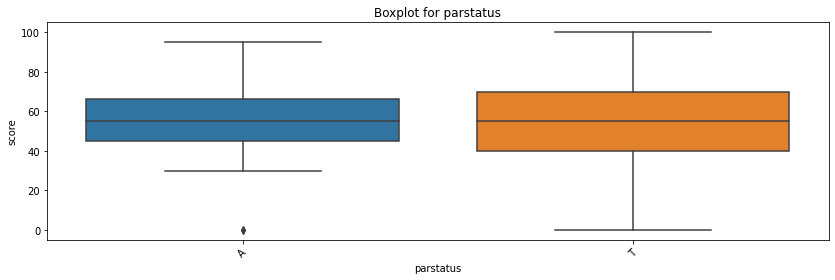

In [39]:
get_boxplot(stud_df, 'parstatus')

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


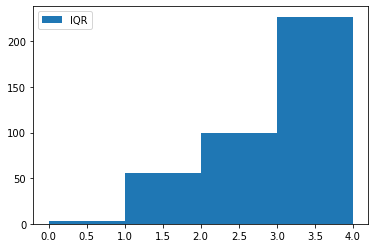

In [40]:
'''analysing parrents education level impact'''
quan_anal(stud_df, 'medu', 4)
#we see that vast majority of mothers have higher education

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


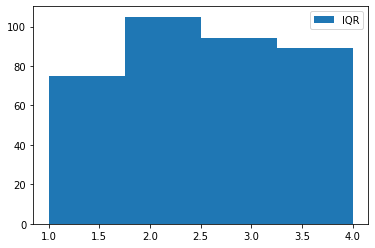

In [41]:
quan_anal(stud_df, 'fedu', 4)
#fathers' education level is spread pretty mach equally across dataset

In [42]:
'''checking correlation of parrents education with math score'''
pedu = pd.DataFrame({'medu':stud_df['medu'], 'fedu':stud_df['fedu'], 'score':stud_df['score']})
pedu.corr()
#we see that there is high positive correlation between mother's and fathers education with correlation of 0.62
#we also see that mothers' education has postive correlation with math score of 0.21 as well as fathers' has 0.13
#I would assume this as one of the parameters for future model as it seems having impact on students' results

,medu,fedu,score
medu,1.000000,0.621981,0.213349
fedu,0.621981,1.000000,0.130923
score,0.213349,0.130923,1.000000


In [43]:
'''analysing mothers job impact'''
qual_anal(stud_df, 'mjob')
#majority of mothers have job outside of proposed categories

,mjob
other,146
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [44]:
stud_df.groupby(['mjob'])[['score']].describe()
#seems that students whos mothers are working at home have significantly lower average score,
#though median is pretty much the same
#we also see that students whos mothers are wroking in healthcare have higher average, median and max score

score                                                     
          count       mean        std  min   25%   50%    75%    max
mjob                                                                
at_home    58.0  45.689655  23.868210  0.0  40.0  50.0  63.75   95.0
health     32.0  60.625000  21.580681  0.0  50.0  65.0  75.00  100.0
other     146.0  50.273973  22.227513  0.0  40.0  55.0  65.00   95.0
services   98.0  54.744898  23.068393  0.0  45.0  55.0  70.00   95.0
teacher    55.0  55.181818  22.463213  0.0  45.0  55.0  72.50   95.0

In [45]:
'''looking at fathers jobs impact'''
qual_anal(stud_df, 'fjob')

,fjob
other,230
services,99
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [46]:
stud_df.groupby(['fjob'])[['score']].describe()
#in regards to fathers we see that students with fathers in healthcare have lowest max score,
#though pretty much same average and median
#on the other side we see that students with teaching fathers are having highest average and median score as well
#as pretty high max score

score                                                       
          count       mean        std   min    25%   50%    75%    max
fjob                                                                  
at_home    16.0  51.875000  25.876308   0.0  43.75  55.0  66.25   95.0
health     15.0  55.666667  14.984119  35.0  42.50  55.0  67.50   80.0
other     230.0  51.891304  23.020048   0.0  40.00  55.0  65.00  100.0
services   99.0  50.454545  21.666429   0.0  45.00  55.0  65.00   90.0
teacher    29.0  59.827586  27.434427   0.0  50.00  70.0  80.00   95.0

In [47]:
parjobs_df = pd.DataFrame({'father':stud_df['fjob'], 'mother':stud_df['mjob'], 'score':stud_df['score']})
parjobs_df.corr()

,score
score,1.0


In [48]:
'''checking impact of traveltime'''
stud_df.groupby(['traveltime'])[['score']].describe()
#students who travel more than 60 min have very low max score, but their average and median score are alligned
#with others
#students travelling between 30 and 60 min have lower average score and higher standard deviation, but I do not
#cosider it as a patternt to be used

score                                                      
            count       mean        std   min    25%   50%   75%    max
traveltime                                                             
1.0         239.0  53.577406  22.794876   0.0  45.00  55.0  70.0  100.0
2.0          94.0  51.755319  21.486523   0.0  41.25  50.0  65.0   95.0
3.0          21.0  46.428571  26.558561   0.0  40.00  50.0  65.0   90.0
4.0           7.0  50.000000   9.128709  35.0  47.50  50.0  52.5   65.0

In [49]:
ttime_df = pd.DataFrame({'ttime':stud_df['traveltime'], 'score':stud_df['score']})
ttime_df.corr()
#there is slight negative correlation of -0.07 that we can ignore

,ttime,score
ttime,1.000000,-0.070559
score,-0.070559,1.000000


In [50]:
'''interconnection with study time'''
stud_df.groupby(['studytime'])[['score']].describe()
#here we see obvious pattern - higher study time = better results
#students with more studytime has higher average score as well as median and max score

score                                                    
           count       mean        std  min   25%   50%   75%    max
studytime                                                           
1.0        103.0  49.466019  24.383704  0.0  40.0  50.0  65.0   95.0
2.0        189.0  50.820106  21.530271  0.0  40.0  55.0  65.0   95.0
3.0         63.0  57.777778  22.392715  0.0  50.0  60.0  75.0   95.0
4.0         27.0  56.296296  26.406315  0.0  45.0  60.0  72.5  100.0

In [51]:
stime_df = pd.DataFrame({'stime':stud_df['studytime'], 'score':stud_df['score']})
stime_df.corr()
#though correlation coefficient is not very high, it is still feasible correlation of 0.12 between
#study time and score

,stime,score
stime,1.000000,0.115741
score,0.115741,1.000000


In [52]:
'''checking failures column impact on score'''
stud_df.groupby(['failures'])[['score']].describe()
#here we see massive impact. with increase of failures we see decrease of average, median, min and max score across
#the dataframe
#this was confirmed by correlation coefficinet earlier

score                                                      
          count       mean        std  min    25%   50%    75%    max
failures                                                             
0.0       290.0  56.051724  20.905474  0.0  46.25  55.0  70.00  100.0
1.0        48.0  40.000000  23.856843  0.0  32.50  42.5  60.00   90.0
2.0        15.0  32.333333  24.191695  0.0  10.00  40.0  45.00   75.0
3.0        14.0  29.642857  20.797955  0.0   6.25  35.0  48.75   50.0

In [53]:
fail_df = pd.DataFrame({'fail':stud_df['failures'], 'score':stud_df['score']})
fail_df.corr()
#we see negative correlation coefficient of 0.34 - largest correlation to score across all factors

,fail,score
fail,1.000000,-0.344338
score,-0.344338,1.000000


In [54]:
'''checking school support impact'''
qual_anal(stud_df, 'schoolsup')
#9 lines miss data. we will ignore them.
#only 49 students out of total 380 observations have school support

,schoolsup
no,331
yes,49


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  380 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [55]:
stud_df.groupby(['schoolsup'])[['score']].describe()
#interesting to see that students with school support have lower average, median, min and max scores
#it may be driven by the fact that only students with issues in math are getting school support. so their results
#are worse than of those who does not get it
#I will not use this parameter in the future model

score                                                    
           count       mean        std  min   25%   50%   75%    max
schoolsup                                                           
no         331.0  53.126888  23.953153  0.0  45.0  55.0  70.0  100.0
yes         49.0  47.040816  14.610155  0.0  40.0  50.0  55.0   85.0

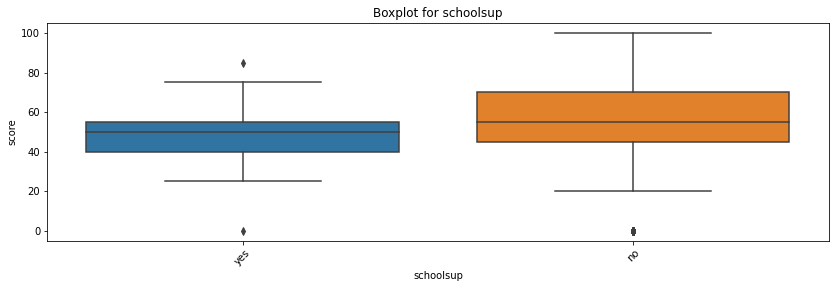

In [56]:
get_boxplot(stud_df,'schoolsup')

In [57]:
'''family support analysis'''
qual_anal(stud_df, 'famsup')
#this column has significant number of missing data. we have only 351 observations with data out of 389 total

,famsup
yes,216
no,135


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  351 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [58]:
stud_df.groupby(['famsup'])[['score']].describe()
#as we can see from the table below there is no significant impact on the math score from family support
#students with and without family support have comparable score statistics

score                                                    
        count       mean        std  min   25%   50%   75%    max
famsup                                                           
no      135.0  52.074074  23.997708  0.0  42.5  55.0  67.5  100.0
yes     216.0  51.712963  22.962680  0.0  40.0  55.0  70.0   95.0

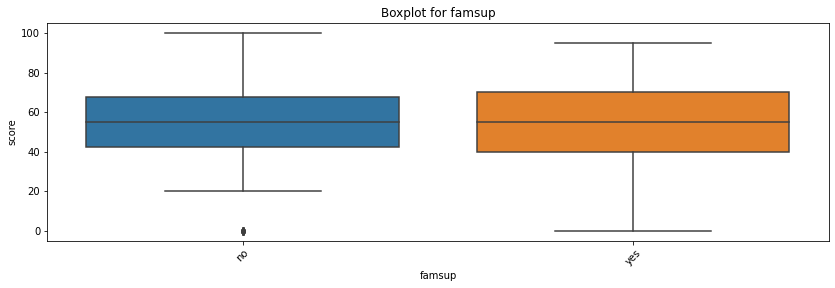

In [59]:
get_boxplot(stud_df,'famsup')

In [60]:
'''additional paid classes impact analysis'''
qual_anal(stud_df, 'paid')
#we see that significant number of students have additional paid classes
#again 39 observations out of total 389 have no data provided for this factor

,paid
no,197
yes,153


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    350 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [61]:
stud_df.groupby(['paid'])[['score']].describe()
#from the table below we see that overall results are quite similar for both groups
#nevertheless, interesting fact is that standard deviation for those taking paid classes is lower
#as well as 25% percentile is higher for them. I think we can conclude that students who gets the paid
#additional classes have more consistent results, but not better results

score                                                   
      count      mean        std  min   25%   50%   75%    max
paid                                                          
no    197.0  50.35533  25.522612  0.0  40.0  55.0  70.0  100.0
yes   153.0  55.00000  19.313889  0.0  45.0  55.0  70.0   95.0

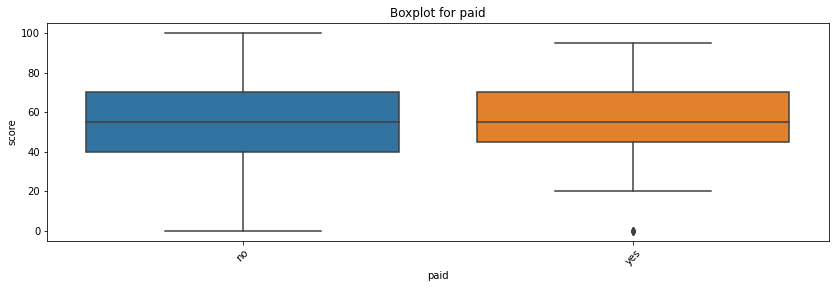

In [62]:
get_boxplot(stud_df,'paid')

In [63]:
'''additional activities impact'''
qual_anal(stud_df, 'activities')
#larger part of students are involved into additional activitied outside of school

,activities
yes,192
no,183


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  375 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [64]:
stud_df.groupby(['activities'])[['score']].describe()
#as we see from statistics it has almost no impact on math score results

score                                                    
            count       mean        std  min   25%   50%   75%    max
activities                                                           
no          183.0  52.185792  22.357692  0.0  40.0  55.0  65.0   95.0
yes         192.0  52.682292  23.568283  0.0  45.0  55.0  70.0  100.0

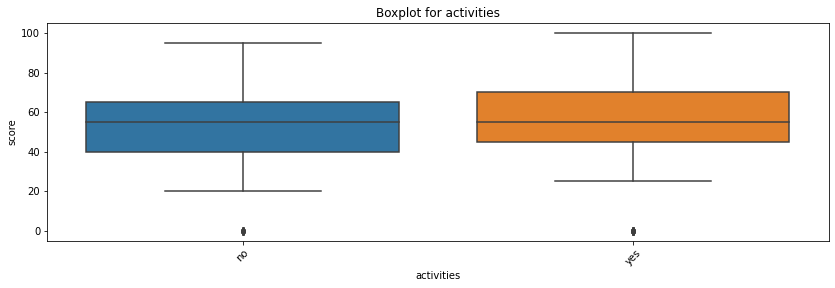

In [65]:
get_boxplot(stud_df,'activities')

In [66]:
'''checking nursery impact on math score'''
qual_anal(stud_df, 'nursery')
#most of students were in nursery prior to the school

,nursery
yes,297
no,77


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [67]:
stud_df.groupby(['nursery'])['score'].describe()
#students who've being in nursery have averall higher average and max score. it does not represent a large
#difference as well as it may be driven by just larger number of observations.

,count,mean,std,min,25%,50%,75%,max
nursery,,,,,,,,
no,77.0,50.000000,22.492689,0.0,40.0,55.0,65.0,90.0
yes,297.0,52.962963,22.745848,0.0,40.0,55.0,70.0,100.0


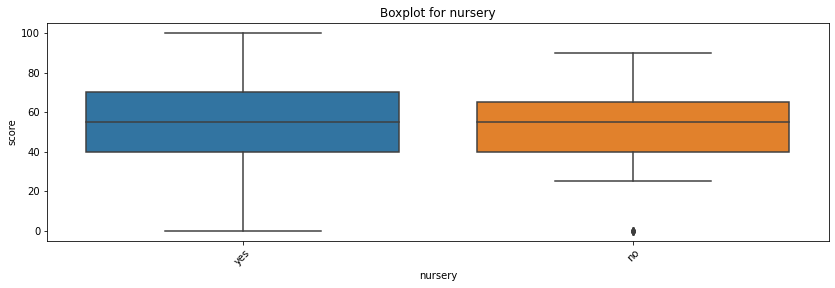

In [68]:
get_boxplot(stud_df,'nursery')

In [69]:
'''impact of wish to continue the education in university'''
qual_anal(stud_df,'uni_wish')
#vast majority of students plan to go to university so this should not be the major factor

,uni_wish
yes,350
no,19


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uni_wish  369 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [70]:
stud_df.groupby(['uni_wish'])['score'].describe()
#statistics shows that students who plan go to the university have significantly higher resutls in math
#this factor should be considered as one of the major impacting parameters

,count,mean,std,min,25%,50%,75%,max
uni_wish,,,,,,,,
no,19.0,33.684211,24.767929,0.0,0.0,40.0,50.0,65.0
yes,350.0,53.100000,22.676339,0.0,45.0,55.0,70.0,100.0


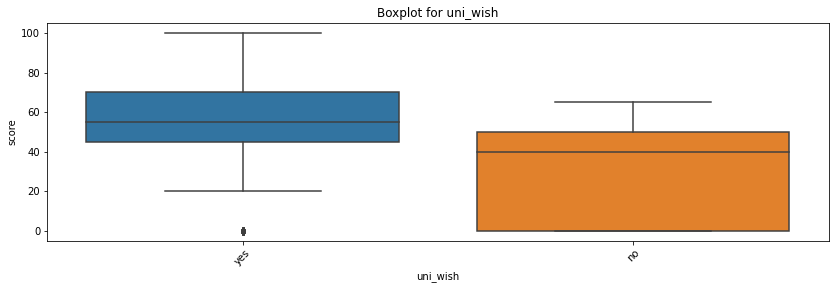

In [71]:
get_boxplot(stud_df,'uni_wish')

In [72]:
'''access to internet impact'''
qual_anal(stud_df,'internet')
#only 55 students do not have access to internet. we also miss data for 34 students.

,internet
yes,300
no,55


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  355 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [73]:
stud_df.groupby(['internet'])['score'].describe()
#we see some impact on average and median as well as on the max score.
#let's keep this parameter in the model as it seems to have feasible impact on the result

,count,mean,std,min,25%,50%,75%,max
internet,,,,,,,,
no,55.0,49.090909,22.028830,0.0,42.5,50.0,60.0,90.0
yes,300.0,53.116667,22.691837,0.0,40.0,55.0,70.0,100.0


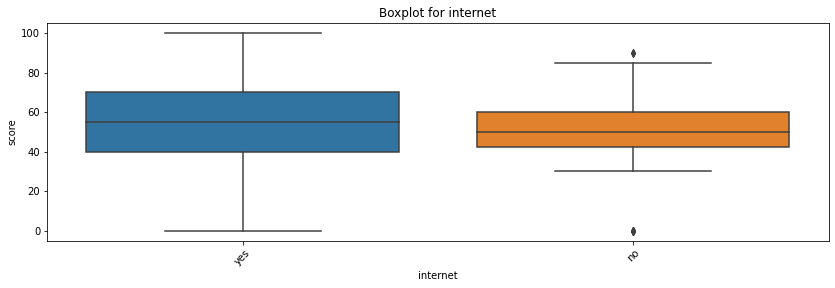

In [74]:
get_boxplot(stud_df,'internet')

In [75]:
'''impact of romantic relation on the math exam score'''
qual_anal(stud_df,'romantic')

,romantic
no,235
yes,123


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [76]:
stud_df.groupby(['romantic'])['score'].describe()
#interesting that students with romantic relations have lower average and max score. though median remains unchanged
#seems that lack of romantic relations give better results in math exam. makes sense to explore further

,count,mean,std,min,25%,50%,75%,max
romantic,,,,,,,,
no,235.0,54.574468,22.126042,0.0,45.0,55.0,70.0,100.0
yes,123.0,47.682927,24.564174,0.0,40.0,55.0,65.0,90.0


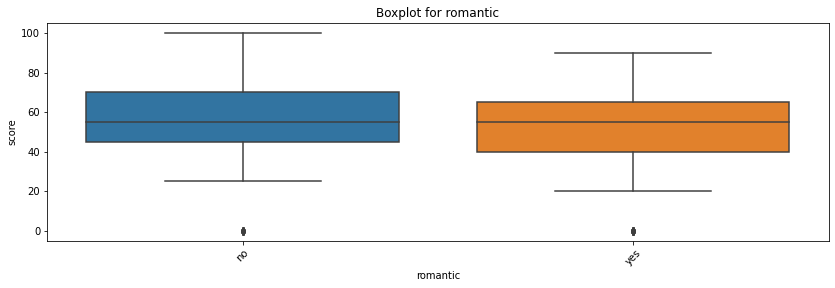

In [77]:
get_boxplot(stud_df,'romantic')

In [78]:
'''family relations impact on math score'''
stud_df.groupby(['famrel'])['score'].describe()
#there is no consistent evidence of family relations impact on math score

,count,mean,std,min,25%,50%,75%,max
famrel,,,,,,,,
1.0,8.0,53.125000,24.192310,0.0,51.25,60.0,65.0,80.0
2.0,17.0,48.529412,28.326484,0.0,35.00,55.0,75.0,85.0
3.0,62.0,51.451613,22.713235,0.0,45.00,55.0,65.0,95.0
4.0,178.0,51.573034,21.766552,0.0,40.00,52.5,65.0,100.0
5.0,97.0,54.896907,23.880992,0.0,45.00,55.0,70.0,95.0


In [79]:
famrel_df = pd.DataFrame({'famrel':stud_df['famrel'], 'score':stud_df['score']})
famrel_df.corr()
#there is minimal positive correlation of 0.05 that we can ignore. seems family relations and math are not correlated

,famrel,score
famrel,1.000000,0.055305
score,0.055305,1.000000


In [80]:
'''freetime relations impact on math score'''
stud_df.groupby(['freetime'])['score'].describe()
#there is no obvious pattern

,count,mean,std,min,25%,50%,75%,max
freetime,,,,,,,,
1.0,18.0,48.333333,24.131990,0.0,40.0,50.0,55.0,90.0
2.0,63.0,57.539683,21.153681,0.0,50.0,60.0,70.0,100.0
3.0,152.0,48.947368,23.848526,0.0,40.0,50.0,65.0,95.0
4.0,110.0,52.636364,21.500044,0.0,40.0,55.0,70.0,95.0
5.0,37.0,56.351351,23.559872,0.0,45.0,60.0,70.0,95.0


In [81]:
freetime_df = pd.DataFrame({'freetime':stud_df['freetime'], 'score':stud_df['score']})
freetime_df.corr()
#correlation is very minimal

,freetime,score
freetime,1.000000,0.019026
score,0.019026,1.000000


In [82]:
'''go out relations impact on math score'''
stud_df.groupby(['goout'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
goout,,,,,,,,
1.0,23.0,49.347826,26.684365,0.0,47.5,55.0,65.0,85.0
2.0,101.0,55.990099,22.902181,0.0,50.0,60.0,70.0,100.0
3.0,126.0,55.158730,21.184301,0.0,45.0,55.0,70.0,95.0
4.0,81.0,49.506173,21.412685,0.0,40.0,50.0,65.0,95.0
5.0,51.0,44.509804,25.382177,0.0,30.0,50.0,60.0,90.0


In [83]:
goout_df = pd.DataFrame({'goout':stud_df['goout'], 'score':stud_df['score']})
goout_df.corr()
#there is considerable negative correlation of go out time and math exam score

,goout,score
goout,1.000000,-0.129685
score,-0.129685,1.000000


In [84]:
'''health relations impact on math score'''
stud_df.groupby(['health'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
1.0,47.0,59.361702,21.759981,0.0,50.0,65.0,75.0,95.0
2.0,42.0,52.619048,27.235157,0.0,45.0,55.0,70.0,100.0
3.0,88.0,50.625000,20.578033,0.0,40.0,52.5,60.0,95.0
4.0,60.0,50.833333,24.549615,0.0,40.0,50.0,70.0,95.0
5.0,137.0,52.189781,22.547836,0.0,40.0,55.0,65.0,90.0


In [85]:
health_df = pd.DataFrame({'health':stud_df['health'], 'score':stud_df['score']})
health_df.corr()
#respectively minimal negative correlation that can be ignored

,health,score
health,1.00000,-0.07046
score,-0.07046,1.00000


In [86]:
stud_df.groupby(['absences'])['score'].describe()
#we see couple of extreme values which I will exclude from the data. let's check correlation

,count,mean,std,min,25%,50%,75%,max
absences,,,,,,,,
0.0,110.0,42.363636,32.273978,0.0,0.00,50.0,70.00,95.0
1.0,3.0,65.000000,8.660254,60.0,60.00,60.0,67.50,75.0
2.0,60.0,58.916667,14.789244,25.0,50.00,55.0,70.00,90.0
3.0,7.0,57.857143,17.525492,35.0,47.50,55.0,70.00,80.0
4.0,52.0,56.538462,15.388386,30.0,50.00,55.0,70.00,100.0
5.0,5.0,58.000000,27.748874,35.0,35.00,45.0,80.00,95.0
6.0,30.0,59.166667,16.716878,30.0,50.00,60.0,70.00,95.0
7.0,6.0,62.500000,20.676073,30.0,51.25,70.0,73.75,85.0
8.0,20.0,51.750000,11.728844,25.0,48.75,50.0,60.00,70.0


In [87]:
abs_df = pd.DataFrame({'abs':stud_df['absences'], 'score':stud_df['score']})
abs_df.corr()
#we see that correlation of basenses hours and score is not significant being just 0.07

,abs,score
abs,1.000000,0.065283
score,0.065283,1.000000
